- **interdisiplinary schools**

- **presenter : Fatemeh Jafari**

![Binary Example](https://www.tutorialspoint.com/numpy/images/numpy-mini-logo.jpg)


# **Session 2: NumPy for Neuroimaging Data Analysis**

| Section | Title | Key Topics | Learning Goals |
|:--:|:--|:--|:--|
| **1** | **Arrays and Their Properties** | `ndarray` creation • attributes (`shape`, `ndim`, `dtype`) • memory layout | Understand how NumPy arrays store and represent multidimensional data |
| **2** | **Numerical Operations** | Element-wise math • ufuncs (`np.sqrt`, `np.exp`, etc.) • broadcasting • aggregations (`sum`, `mean`, `std`) | Perform fast numerical computations on large datasets |
| **3** | **Indexing, Slicing, and Reshaping** | Indexing & slicing • Boolean/fancy indexing • `reshape`, `ravel`, `flatten` • stacking & splitting | Efficiently access, reshape, and manipulate multidimensional imaging data |
| **4** | **Special and Random Arrays** | `zeros`, `ones`, `full`, `eye`, `diag` • random generation (`rand`, `randn`, `randint`) • reproducibility with `seed` | Generate synthetic datasets and initialize test arrays for simulations |
| **5** | **Matrix and Linear Algebra Operations** | Matrix multiplication (`@`, `dot`) • inverse, determinant • eigen decomposition • norms | Apply matrix algebra for image transformations, PCA, and spatial modeling |
| **6** | **3D and 4D Arrays in Neuroimaging** | Representing voxel data (x, y, z, time) • slicing and temporal signals • simple visualizations | Work with multidimensional MRI/fMRI-style data and extract voxel-level info |
| **7** | **Memory and Performance Optimization** | Data types (`float32`, `float64`) • broadcasting tricks • vectorization • `%timeit` profiling | Optimize memory usage and computational speed for large imaging arrays |

---

###  *Teaching Flow*
1. **Start** by connecting arrays to real-world neuroimaging data (voxels, volumes).  
2. **Demonstrate** operations interactively using small synthetic arrays before moving to 3D/4D data.  
3. **Highlight** how NumPy underpins libraries like *NiBabel*, *SciPy*, and *Pandas*.  
4. **End** with a short project: simulate and analyze a 4D fMRI-like dataset (64×64×32×120).

---

### *Learning Outcomes*
By the end of this session, students will be able to:
- Understand and manipulate multi-dimensional arrays in Python.  
- Perform numerical and linear algebra operations efficiently.  
- Model neuroimaging data using NumPy’s broadcasting and slicing techniques.  
- Write optimized, reproducible analysis code for MRI/fMRI datasets.


---

> ## **WHAT is NumPy?**

*NumPy is a Python package. It stands for 'Numerical Python'. It is a library consisting of multidimensional array objects and a collection of routines for processing of array.*

- *it provides:*

    - *A powerful N-dimensional array object (ndarray)*

    - *Functions for mathematical operations on arrays*

    - *Tools for linear algebra, Fourier transforms, random number generation, and more.*

    - *It replaces slower, less efficient Python loops and lists with optimized array operations.*


---

> ## **Why is NumPy Faster Than Python Lists?**

*NumPy arrays are **significantly faster** and more memory-efficient than standard Python lists because they are implemented in **C**, use **contiguous memory**, and support **vectorized operations**.*


###  *NumPy **vs** Python Lists*

| **Aspect** | **NumPy** | **Python List** |
|:--|:--|:--|
| **Memory Storage** | Uses a contiguous block of memory, improving cache efficiency and access speed. | Consists of pointers to individual objects, causing memory fragmentation and slower access. |
| **Data Types** | Supports homogeneous data types (all elements have the same type), leading to efficient memory use. | Can contain heterogeneous data types, adding overhead for type tracking. |
| **Operations** | Uses vectorized operations that leverage SIMD (Single Instruction, Multiple Data) for fast parallel computation. | Relies on slow, loop-based operations executed in Python’s interpreter. |
| **Efficiency** | Written in C and optimized for performance, minimizing execution time for numerical operations. | Executed as Python bytecode — slower compared to compiled C operations. |
| **Memory Usage** | Requires less memory due to fixed data types and contiguous storage. | Uses more memory since each element is a separate Python object with extra overhead. |


---

> ## **WHY is NumPy Essential in Neuroimaging?**

*In computational neuroscience and neuroimaging, data is typically represented as **large, high-dimensional numerical arrays** (for example, a 4D fMRI dataset: `[x, y, z, time]`).  
NumPy is essential because it provides the foundation for fast, efficient, and memory-aware manipulation of such data.*



### *1) A Data Model Suited for Imaging*

- *`ndarray` is a **dense, N-dimensional array** that can represent 2D, 3D, or 4D data (and beyond).*  
- *Key attributes: `shape`, `ndim`, `dtype`, `strides`, and **contiguous memory layout** (C- or Fortran-style).*  
- *These properties make it ideal for MRI/fMRI volumes, where spatial and temporal dimensions must be handled together.*


### *2) High Computational Efficiency*

- ***Vectorization** and **broadcasting** replace slow Python loops, drastically improving runtime.*  
- *Operations are executed in compiled C, taking advantage of **CPU cache locality** and **SIMD** (parallel) instructions.*  
- *Explicit data-type control (`float32` vs. `float64`) allows balancing precision and memory usage.*



### *3) A Rich Numerical Toolbox*
- *Statistical and mathematical functions: `np.mean`, `np.std`, `np.percentile`, `np.corrcoef`, `np.convolve`, `np.fft`, etc.*  
- *Linear algebra: `np.dot`, `@`, `np.linalg.svd`, `np.linalg.eig`, `np.linalg.inv`, `np.linalg.lstsq` — for regression, PCA, and spatial modeling.*  
- *Random sampling and reproducibility: `np.random.rand`, `np.random.randn`, and `np.random.seed`.*



### *4) Indexing, Masking, and Reshaping*
- *Boolean masks enable region-of-interest (ROI) selection within brain volumes.*  
- *Efficient reshaping between 4D (`x, y, z, time`) and 2D (`voxels × time`) forms supports matrix-based analyses.*  
- *NumPy **views** (not copies) conserve memory while transforming data structures.*



### *5) Integration with the Neuroimaging Ecosystem*
- *Libraries such as **NiBabel**, **SciPy**, **scikit-learn**, and **Pandas** operate directly on NumPy arrays.*  
- *NIfTI and BIDS files are typically loaded as NumPy arrays (often memory-mapped) — enabling in-place computation without extra conversion.*



### *6) Typical Applications in fMRI/MRI Pipelines*
- ***Temporal preprocessing:** filtering, z-scoring, detrending, motion regression.*  
- ***Spatial operations:** ROI averaging, slice extraction, and affine transformations.*  
- ***Statistical analysis:** voxel-wise correlation, GLM computation, PCA/SVD-based dimensionality reduction.*

---

> ## **NumPy Arrays (ndarray): Concepts, Rationale, and Neuroimaging Context**

### *1) What is an `ndarray`?*

##### *An **ndarray** (n-dimensional array) is NumPy’s core data structure: a `dense`, `homogeneous`, `multi-dimensional` block of numeric values with a single data type (`dtype`) and explicit shape.*

- *Key properties:*
    - ***dtype*** *: the fixed element type (e.g., `float32`, `int16`)*
    - ***shape*** *: tuple of lengths along each axis (e.g., `(64, 64, 32, 120)`)*
    - ***ndim*** *: number of axes (rank)*
    - ***strides*** *: byte steps to move one element along each axis (memory layout)*
    - ***order*** *: C-contiguous (row-major) or Fortran-contiguous (column-major)*


### *2) Why not plain Python lists?*

| Aspect | Python List | NumPy `ndarray` |
|:--|:--|:--|
| Storage | Array of object pointers, scattered in memory | Dense, contiguous numeric buffer |
| Types | Heterogeneous, dynamic | Homogeneous, fixed `dtype` |
| Arithmetic | Loops in Python, slow | Vectorized ufuncs in C, fast |
| Multi-D data | Nested lists, awkward indexing | Native N-D with slicing, broadcasting |
| Memory overhead | Per-element object headers | One buffer + lightweight metadata |


### *3) NumPy’s solution: `ndarray`*
- ***Fixed data type*** → *compact representation and predictable arithmetic.*
- ***Vectorization and ufuncs*** → *element-wise ops in compiled code (no Python loops).*
- ***Broadcasting and advanced indexing*** → *write high-level math that scales to large arrays.*
- ***Views vs copies*** → *reshape, slice, and reorder data **without** duplicating memory when possible.*
- ***Strides and order*** → *control layout for performance-critical routines.*




---

> ## **Understanding n-Dimensional Arrays (Vectors, Matrices, Tensors)**

### *What’s the Alternative to Arrays?*

*In mathematics, numerical data are often represented as **vectors**, **matrices**, or more generally, **tensors**.* 
*NumPy’s `ndarray` provides a **unified representation** of all these objects in code.*  
*It can store Scalar(0-D), vectors (1-D), matrices (2-D), and higher-order tensors (3-D, 4-D, and beyond) in one consistent data model.*



### *1) The Dimensional Hierarchy*

| Dimensionality | Mathematical Object | Typical Shape | Conceptual Example |
|:--:|:--|:--|:--|
| **0D** | Scalar | `()` | A single number: 7.2 |
| **1D** | Vector | `(n,)` | A list of values, e.g. intensity along one axis |
| **2D** | Matrix | `(m, n)` | Rows × columns — an image or correlation matrix |
| **3D** | Tensor (Rank-3) | `(x, y, z)` | MRI volume (voxels in 3D space) |
| **4D+** | Higher-order Tensor | `(x, y, z, t)` | fMRI data varying over time |




### *2) In linear algebra:*
- * A **`scalar**` is a single number*

- *A `**vector**` is a one-dimensional array of numbers that represents a point or direction in space.* 

  - *It has both **magnitude** and **direction**.*

- *A `**matrix**` can be viewed as a **collection of vectors**, stacked along a new axis.*

- *A `**tensor**` generalizes this idea: it can represent relationships between multiple directions or dimensions.*




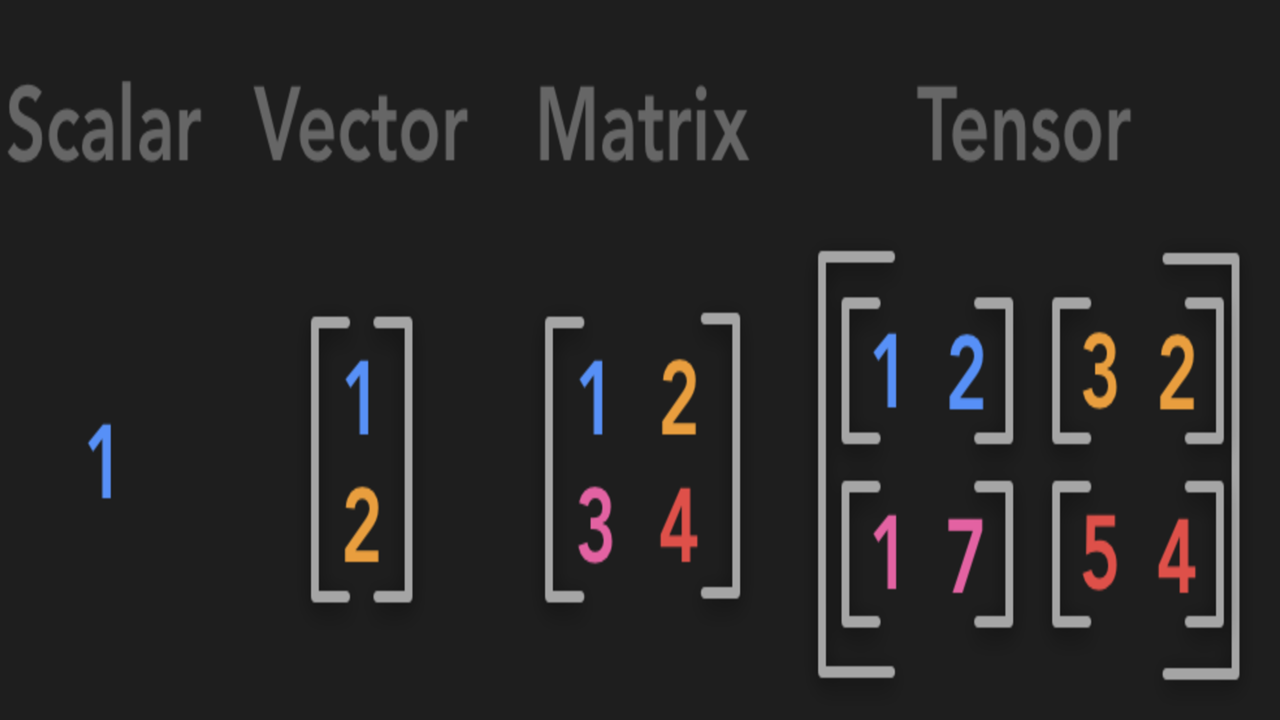

In [1]:
from IPython.display import Image
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide1.PNG', width= 1000) 

## **Why `ndarray` Is So Useful in Neuroimaging**

In neuroimaging, we work with **large, structured, and numerical data** — making NumPy’s `ndarray` the perfect container for voxel-based analysis.

| **Use Case** | **How `ndarray` Helps** |
|:--|:--|
| **Brain images (e.g., NIfTI files)** | Loaded as 3D or 4D arrays of voxel intensities, enabling direct manipulation of imaging data. |
| **Time-series analysis** | Access voxel-wise signals over time to study temporal dynamics or brain activation patterns. |
| **Spatial filtering** | Apply filters, convolution kernels, or smoothing operations efficiently across the entire image. |
| **Region-of-interest (ROI) extraction** | Use boolean masks to isolate and analyze specific brain regions. |
| **Statistical mapping** | Generate and manipulate z-score maps, t-maps, p-value distributions, and other statistical outputs. |



Mean (list): 0.49998 | Time: 0.005 seconds
Mean (ndarray): 0.49973 | Time: 0.001032 seconds

NumPy is approximately 5× faster than pure Python lists.



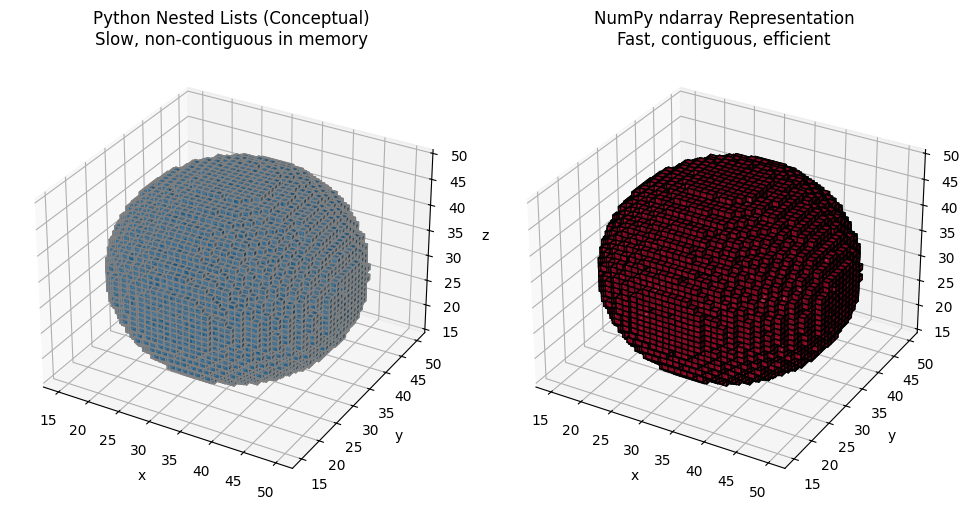

In [ ]:
# Comparison: Python Lists vs NumPy Arrays (with time library)
# ============================================================

import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 1. Create Synthetic 3D Data
shape = (128, 128, 64)

# Fake "brain volume" (3D voxel intensity)
brain_list = [[[np.random.random() for _ in range(shape[2])]
               for _ in range(shape[1])]
              for _ in range(shape[0])]

brain_array = np.random.random(shape)

# 2. Performance Comparison

# --- Using Python Lists ---
start = time.time()
mean_list = sum(sum(sum(slice) for slice in row) for row in brain_list) / (shape[0]*shape[1]*shape[2])
end = time.time()
list_time = end - start
print(f"Mean (list): {mean_list:.5f} | Time: {list_time:.3f} seconds")

# --- Using NumPy Arrays ---
start = time.time()
mean_np = brain_array.mean()
end = time.time()
array_time = end - start
print(f"Mean (ndarray): {mean_np:.5f} | Time: {array_time:.6f} seconds")

# --- Comparison ratio ---
print(f"\nNumPy is approximately {list_time/array_time:.0f}× faster than pure Python lists.\n")

# ----------------------------
# 3. Visualization
# ----------------------------

# Create a small 3D sphere volume to visualize
x, y, z = np.indices((64, 64, 64))
center = np.array([32, 32, 32])
radius = 18
sphere = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2 < radius**2

volume = np.zeros((64, 64, 64))
volume[sphere] = np.random.uniform(0.6, 1.0, size=sphere.sum())  # active voxels
volume += np.random.uniform(0.0, 0.2, size=volume.shape)  # background noise

# 3D plots: Conceptual comparison
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.voxels(volume > 0.7, edgecolor='gray', alpha=0.5)
ax1.set_title("Python Nested Lists (Conceptual)\nSlow, non-contiguous in memory")
ax1.set_xlabel("x"); ax1.set_ylabel("y"); ax1.set_zlabel("z")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.voxels(volume > 0.7, edgecolor='k', alpha=0.6, facecolors='crimson')
ax2.set_title("NumPy ndarray Representation\nFast, contiguous, efficient")
ax2.set_xlabel("x"); ax2.set_ylabel("y"); ax2.set_zlabel("z")

plt.tight_layout()
plt.show()


---

In [1]:
#pip install numpy
import numpy as np

# **Arrays**


## *Creating Arrays*


 

> ## *From a Python list* 


#### **numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0, like=None)**

| Parameter | Type                 | Default  | Description                                   |
| :-------- | :------------------- | :------- | :-------------------------------------------- |
| `object`  |                   | required | Input data to convert into an array           |
| `dtype`   | data-type            | None     | Desired data type of the array                |
| `copy`    | bool                 | True     | Whether to copy data or not                   |
| `order`   | {'C', 'F', 'A', 'K'} | 'K'      | Memory layout of the array                    |
| `subok`   | bool                 | False    | Allow subclasses of ndarray                   |
| `ndmin`   | int                  | 0        | Minimum number of dimensions                  |
| `like`    | array-like           | None     | Create array based on another array’s backend |


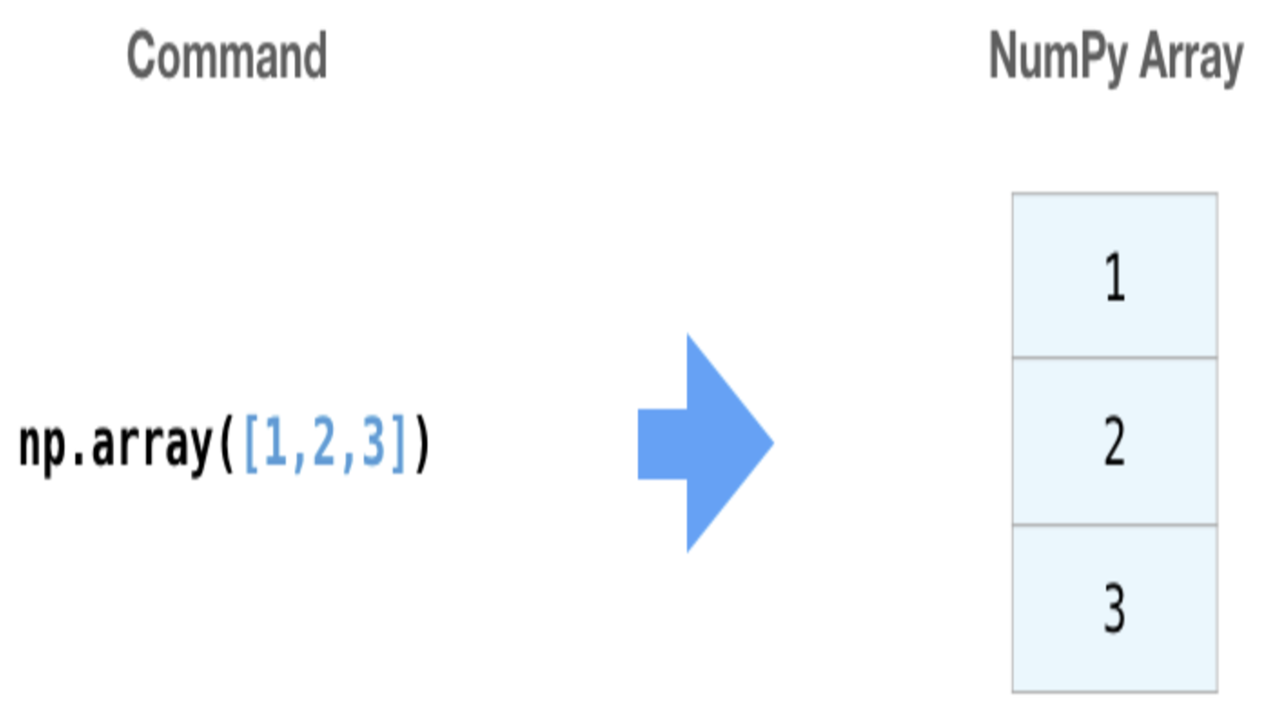

In [ ]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide2.PNG', width=1000 ) 

In [2]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [90]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

> ## *Using built-in functions*




*In NumPy, you can easily create arrays filled with specific values like zeros, ones, or even custom values using built-in functions.* 

*This is very common in neuroimaging, for example, when creating empty masks, design matrices, or template arrays.*


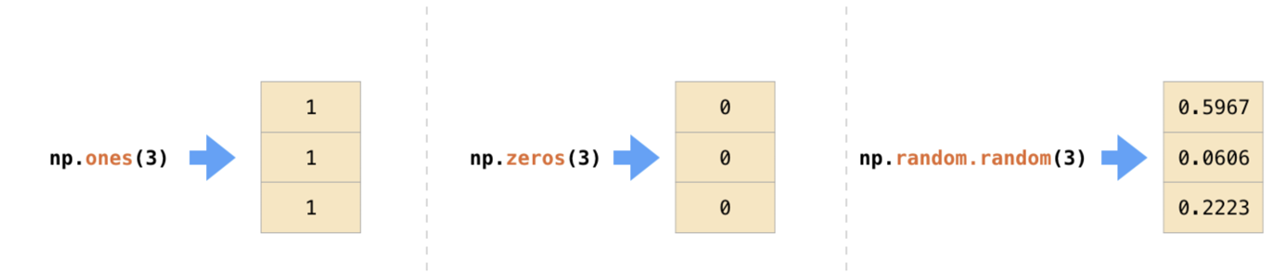

In [23]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide7.PNG', width=2000) 


### *1. Creating Arrays with zeros*


In [4]:
zero_matrix = np.zeros(5) 
zero_matrix


array([0., 0., 0., 0., 0.])

In [4]:
zero_matrix = np.zeros((3, 4))  
zero_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
matrix1 = np.array([1, 2, 3, 4, 5]) 
zero_matrix = np.zeros_like(matrix1)
zero_matrix

array([0, 0, 0, 0, 0])

In [6]:
matrix1 = np.array([[1, 2, 3], [4, 5, 6]]) 
zero_matrix = np.zeros_like(matrix1)
zero_matrix

array([[0, 0, 0],
       [0, 0, 0]])

### *2. Creating Arrays with Ones*


In [5]:
ones_arr = np.ones(5) 
ones_arr

array([1., 1., 1., 1., 1.])

In [8]:
ones_arr = np.ones((3, 4))  
ones_arr

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
matrix1 = np.array([[1, 2, 3], [4, 5, 6]]) 
zero_matrix = np.ones_like(matrix1)
zero_matrix

array([[1, 1, 1],
       [1, 1, 1]])

### *3. Create Arrays with a Specific Value*


In [6]:
full_arr = np.full((3, 3), 7) 
full_arr

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

### *4. Identity Matrix (useful for linear models)*


In [13]:
identity_arr = np.eye(4) 
identity_arr

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### *5. Arange()*


In [7]:
identity_arr = np.arange(12) 
identity_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

---

&nbsp; &nbsp; &nbsp;
> ## *Generating Random Data*

### *1. Generating an array of random numbers between 0 and 1:*

*Application: Initializing weights in neural networks.*

In [8]:
random_array = np.random.rand(3, 4)
random_array

array([[0.49161678, 0.93526147, 0.77022002, 0.15963036],
       [0.8073222 , 0.6265245 , 0.65463897, 0.27696145],
       [0.48785958, 0.61661664, 0.923975  , 0.66534638]])

### *2. Generating an array of random numbers from a normal distribution:*

*Application: Simulating noisy data or generating more natural data for model testing.*

In [9]:
normal_array = np.random.randn(4, 5)  
normal_array

array([[ 0.77621186,  1.27330094, -0.43718829,  1.24259221, -0.35353527],
       [-1.16542087,  1.14882217,  0.1896476 , -0.46715494,  1.22619822],
       [-0.24188156, -0.54623887,  1.37156103, -0.46093803,  1.3582434 ],
       [ 0.48764494, -0.59510789,  0.37078415, -0.50477432, -0.7870361 ]])

### *3. Generating an array of random integers within a specified range:*

*Application: Simulating categorized data, such as class labels.*

In [ ]:
random_int_array = np.random.randint(10, 50, (3, 3))
print(random_int_array)

[[37 42 46]
 [30 10 24]
 [48 34 14]]


---


## *Basic Properties*   

- **Dimensions (shape)**  
- **Data Type (dtype)**  
- **Size (size)** 
- **Number of Dimensions (ndim)**  

| Property                          | Description                                   | Example   |
| :-------------------------------- | :-------------------------------------------- | :-------- |
| **Shape**                         | Dimensions of the array (rows, columns, etc.) | `a.shape` |
| **Data Type (`dtype`)**           | Type of elements (e.g., int32, float64)       | `a.dtype` |
| **Size**                          | Total number of elements                      | `a.size`  |
| **Number of Dimensions (`ndim`)** | Array rank (1D, 2D, 3D, etc.)                 | `a.ndim`  |


- **Dimensions (shape)**

In [1]:
import numpy as np

In [10]:
a = [[1, 2, 3], [4, 5, 6]]
arr = np.array(a)
arr


array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr.size

- **Size**

In [11]:
arr = np.array([1, 2, 3, 4])
arr.size

4

- **number of dimensions(ndim)**

In [12]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.ndim

2

- **shape**

In [13]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.shape

(2, 3)

- **Data Type (dtype)** 

Type of the data (integer, float, Python object, etc.)

Size of the data (how many bytes is in e.g. the integer)

In [14]:
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

---

# **Basic Measurements in NumPy**


> ## *Mathematical Operations*


> ## *Statistical Functions* 


# Mathematical Operations in NumPy (with Notes)

NumPy provides **vectorized**, element-wise math. Most functions **support broadcasting** and have **operator equivalents** where noted.

| Function | Syntax | Description | Example | Output | Notes |
|:--|:--|:--|:--|:--|:--|
| Addition | `np.add(x, y)` | Element-wise add | `np.add([1,2],[3,4])` | `[4,6]` | Operator: `x + y`; broadcasting |
| Subtraction | `np.subtract(x, y)` | Element-wise subtract | `np.subtract([1,2],[3,4])` | `[-2,-2]` | Operator: `x - y`; broadcasting |
| Multiplication | `np.multiply(x, y)` | Element-wise multiply | `np.multiply([1,2],[3,4])` | `[3,8]` | Operator: `x * y`; broadcasting |
| Division | `np.divide(x, y)` | Element-wise divide (float) | `np.divide([1,2],[3,4])` | `[0.333...,0.5]` | Operator: `x / y`; broadcasting |
| Power | `np.power(x, n)` | Raise to n-th power | `np.power([1,2,3],2)` | `[1,4,9]` | Operator: `x ** n`; broadcasting |
| Square Root | `np.sqrt(x)` | sqrt element-wise | `np.sqrt([4,9,16])` | `[2,3,4]` | Equivalent to `x ** 0.5`; non-negative input expected |
| Absolute Value | `np.abs(x)` | magnitude | `np.abs([-1,-2,3])` | `[1,2,3]` | Works with complex: `np.abs(a+bi) = √(a²+b²)` |
| Rounding | `np.round(x)` | round to nearest | `np.round([2.3,2.7,2.5])` | `[2,3,2]` | Bankers’ rounding (ties to even); `np.floor`, `np.ceil` available |
| Exponential | `np.exp(x)` | e^x | `np.exp([1,2])` | `[2.718...,7.389...]` | For large x may overflow; use `dtype=float64` for precision |
| Log (natural) | `np.log(x)` | ln(x) | `np.log([1, np.e, np.e**2])` | `[0,1,2]` | Domain: x>0; use `np.log1p(x)` for small x |
| Log10 | `np.log10(x)` | log base 10 | `np.log10([1,10,100])` | `[0,1,2]` | Domain: x>0 |
| Sine | `np.sin(x)` | sine | `np.sin([0, np.pi/2])` | `[0,1]` | Input in **radians**; use `np.deg2rad` if needed |
| Cosine | `np.cos(x)` | cosine | `np.cos([0, np.pi])` | `[1,-1]` | Radians; broadcasting |
| Tangent | `np.tan(x)` | tangent | `np.tan([0, np.pi/4])` | `[0,1]` | Radians; beware near asymptotes |
| Ceiling | `np.ceil(x)` | round up | `np.ceil([2.1,2.9])` | `[3,3]` | Returns float dtype |
| Floor | `np.floor(x)` | round down | `np.floor([2.1,2.9])` | `[2,2]` | Returns float dtype |
| Clip | `np.clip(x,a,b)` | limit to [a,b] | `np.clip([1,5,10],2,8)` | `[2,5,8]` | Useful for thresholding images |
| Modulus | `np.mod(x,y)` | remainder | `np.mod([10,20],[3,7])` | `[1,6]` | Operator: `x % y`; broadcasting |
| Sign | `np.sign(x)` | −1/0/1 by sign | `np.sign([-3,0,4])` | `[-1,0,1]` | Handles floats and ints |



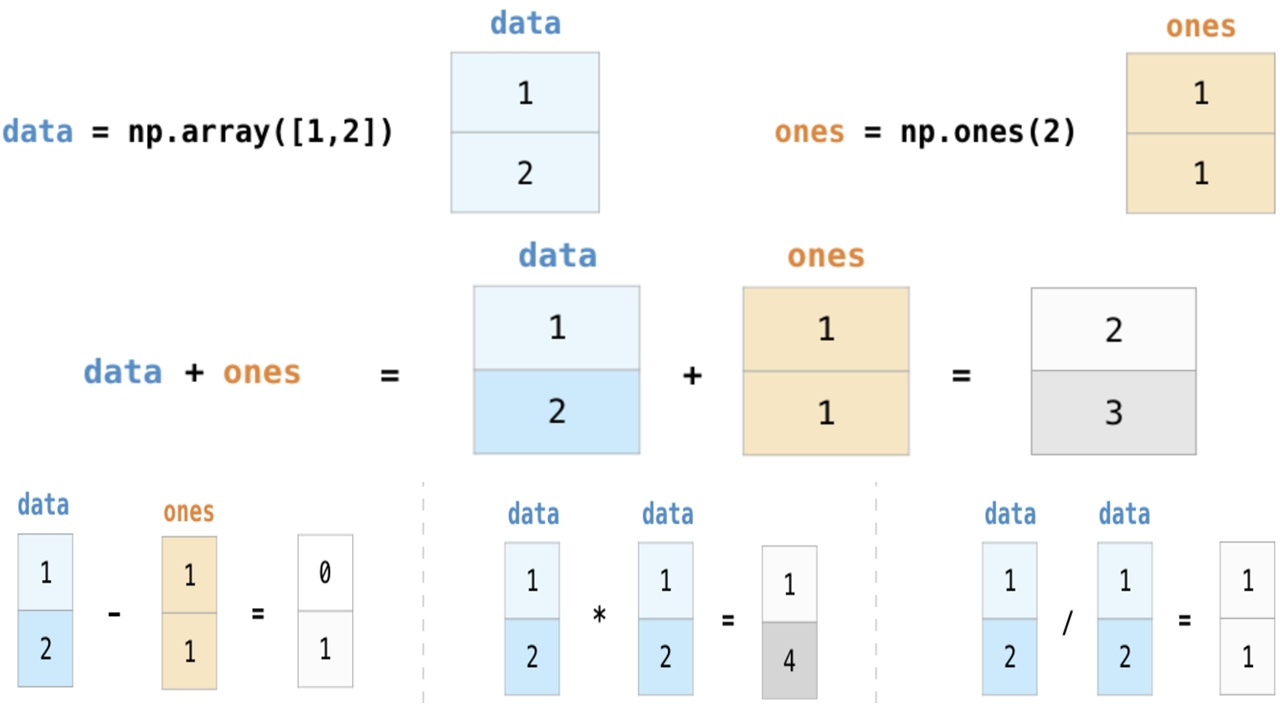

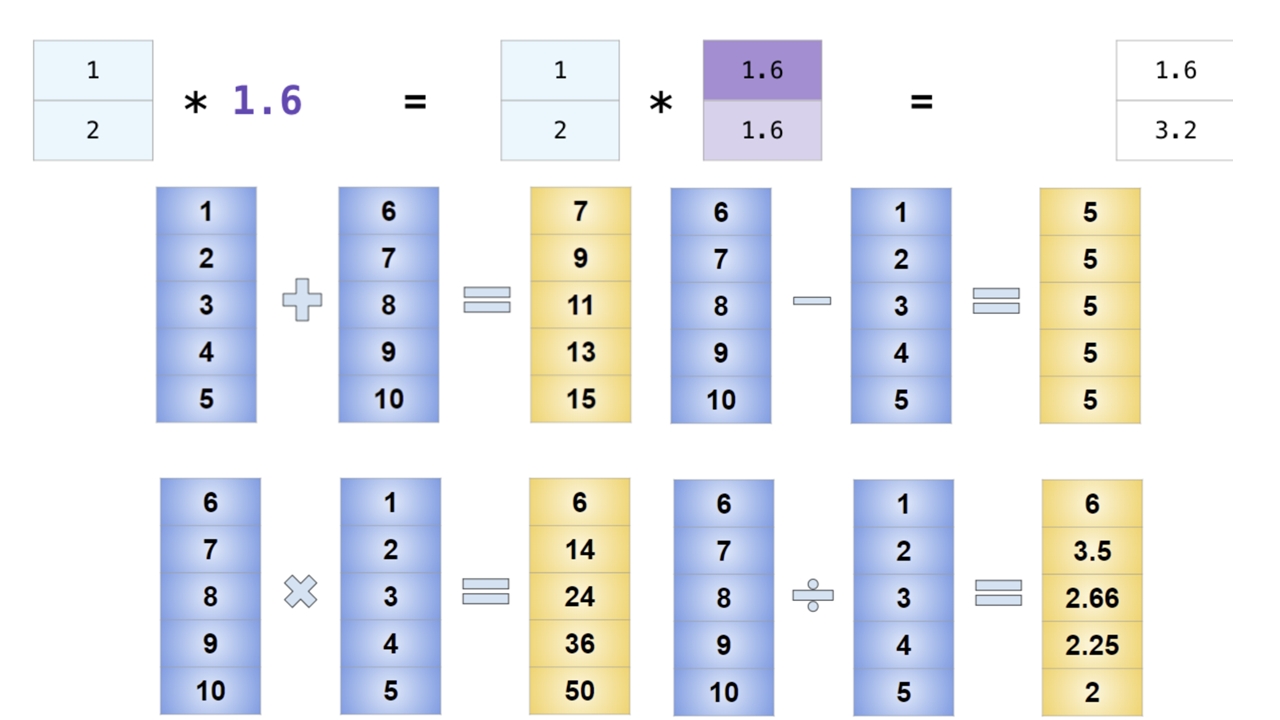

In [87]:

display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Presentation1.png', width=1000))
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Presentation2.png', width=1000))

In [3]:
matrix1 = np.array([1, 2])
matrix2 = np.array([3, 4])
adding = np.add(matrix1, matrix2) 
adding

array([4, 6])

In [4]:
matrix1 = np.array([1, 2])
matrix2 = np.array([3, 4])
subtracting = np.subtract(matrix1, matrix2) 
subtracting

array([-2, -2])

In [5]:
matrix1 = np.array([1, 2])
matrix2 = np.array([3, 4]) 
multi = np.multiply(matrix1, matrix2) 
multi

array([3, 8])

In [6]:
matrix1 = np.array([1, 2])
matrix2 = np.array([3, 4]) 
dividing = np.divide(matrix1, matrix2) 
dividing

array([0.33333333, 0.5       ])

In [7]:
matrix1 = np.array([1, 2, 3, 4])
power_2 = np.power(matrix1, 2) 
power_2 

array([ 1,  4,  9, 16])

In [8]:
matrix1 = np.array([1, -2, -3, -4])
absolute = np.abs(matrix1)
absolute

array([1, 2, 3, 4])

In [9]:
matrix1 = np.array([4, 9, 16])
sqrt_root = np.sqrt(matrix1)
sqrt_root

array([2., 3., 4.])

In [10]:
matrix1 = np.array([2.3, 2.7, 2.5]) 
nearest_intg = np.round(matrix1) 
nearest_intg

array([2., 3., 2.])


## **Matrix Multiplication and Matrix Operations**


> ### *Matrix Multiplication*


| Case                        | Function                 | Output Type | Example                       | Output              |
| :-------------------------- | :----------------------- | :---------- | :---------------------------- | :------------------ |
| Element-wise multiplication | `np.multiply(A, B)`      | array       | `[[1,2]]×[[3,4]]`             | `[[3,8]]`           |
| Dot product (1D vectors)    | `np.dot(a, b)`           | scalar      | `[1,2,3]·[4,5,6]`             | `32`                |
| Matrix product (2D)         | `np.dot(A,B)` or `A @ B` | matrix      | `[[1,2],[3,4]]×[[5,6],[7,8]]` | `[[19,22],[43,50]]` |
| Product of all elements     | `np.prod(A)`             | scalar      | `[[1,2],[3,4]]`               | `24`                |


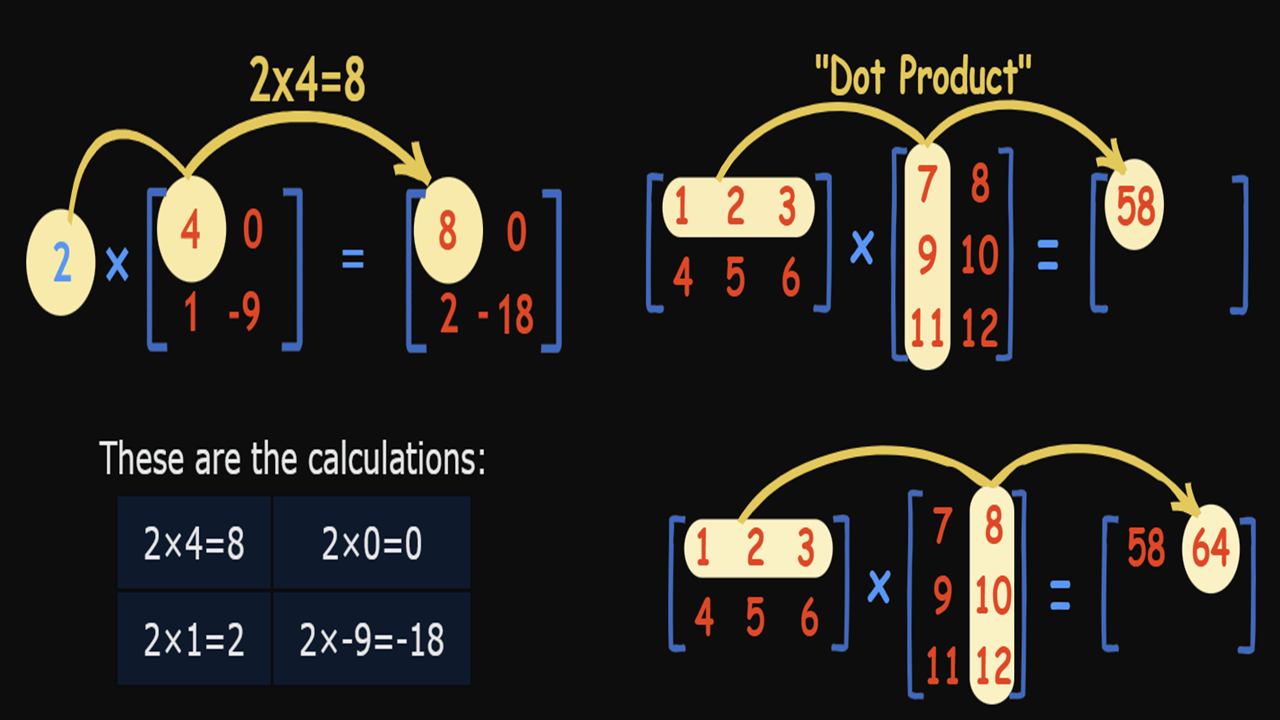

In [3]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\Presentation3.png', width=1000)


In [2]:
# np.multiply()
import numpy as np
a = np.array([[1, 2],
              [3, 4]])
b = np.array([[10, 20],
              [30, 40]])
np.multiply(a, b)



array([[ 10,  40],
       [ 90, 160]])

In [2]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [3]:
B = np.array([[5, 6], [7, 8]])
B

array([[5, 6],
       [7, 8]])

In [5]:
# np.dot()    or   @

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
#np.dot(A, B)
A @ B


array([[19, 22],
       [43, 50]])

In [8]:
# np.prod()

arr = np.array([[1, 2],
                [3, 4]])

a = np.prod(arr)
print(a)



24


---

# **Statistical Functions in NumPy**

NumPy provides **vectorized statistical functions** that efficiently summarize and analyze data across arrays.  
They support `axis` operations, broadcasting, and optional `dtype` for precision control.

---

| **Function** | **Syntax** | **Description** | **Example** | **Output** | **Notes** |
|:--|:--|:--|:--|:--|:--|
| **Mean** | `np.mean(x, axis=None)` | Average value of array elements | `np.mean([1,2,3,4,5])` | `3.0` | `axis=0` → column-wise; `axis=1` → row-wise |
| **Median** | `np.median(x, axis=None)` | Middle value (50th percentile) | `np.median([1,2,3,4,5])` | `3.0` | Works with odd/even lengths; ignores NaN with `np.nanmedian()` |
| **Standard Deviation** | `np.std(x, axis=None)` | Spread of data around the mean | `np.std([1,2,3,4,5])` | `1.414` | Default: population std; use `ddof=1` for sample std |
| **Variance** | `np.var(x, axis=None)` | Mean of squared deviations | `np.var([1,2,3,4,5])` | `2.0` | `std = sqrt(var)`; `ddof` optional |
| **Maximum** | `np.max(x)` | Largest element | `np.max([1,2,3,4,5])` | `5` | Equivalent: `x.max()`; use `np.nanmax()` to ignore NaN |
| **Minimum** | `np.min(x)` | Smallest element | `np.min([1,2,3,4,5])` | `1` | Equivalent: `x.min()`; use `np.nanmin()` to ignore NaN |
| **Sum** | `np.sum(x)` | Sum of all elements | `np.sum([1,2,3,4,5])` | `15` | Handles large arrays efficiently; `np.nansum()` ignores NaN |
| **Product** | `np.prod(x)` | Product of all elements | `np.prod([1,2,3,4,5])` | `120` | `prod` = Π(xᵢ); watch for overflow in int arrays |
| **Mode** | `scipy.stats.mode(x)` | Most frequent value | `mode([1,2,2,3])` | `2` | Not in NumPy core; from SciPy |



In [4]:
matrix1 = np.array([1, 2, 3, 4, 5])
mean = np.mean(matrix1)
mean

np.float64(3.0)

In [5]:
matrix1 = np.array([[1, 2], [3, 4]]) 
matrix1

array([[1, 2],
       [3, 4]])

In [6]:
matrix1 = np.array([[1, 2], [3, 4]]) 
mean_0 = np.mean(matrix1, axis=0) 
mean_0

array([2., 3.])

In [ ]:
matrix1 = np.array([[1, 2], [3, 4]]) 
mean_1 = np.mean(matrix1, axis=1)
mean_1

array([1.5, 3.5])

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
med = np.median(matrix1)
med

np.float64(3.0)

In [9]:
matrix1 = np.array([[1, 2], [3, 4]]) 
matrix1

array([[1, 2],
       [3, 4]])

In [ ]:
matrix1 = np.array([[1, 2], [3, 4]]) 
med_0 = np.median(matrix1, axis=0) 
med_0

array([2., 3.])

In [ ]:
matrix1= np.array([[1, 2], [3, 4]]) 
med_1 = np.median(matrix1, axis=1) 
med_1

array([1.5, 3.5])

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
variance = np.var(matrix1)
variance

np.float64(2.0)

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
std_matrix1 = np.std(matrix1)
std_matrix1

np.float64(1.4142135623730951)

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
max_matrix1 = np.max(matrix1)
max_matrix1

np.int64(5)

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
min_matrix1 = np.min(matrix1)
min_matrix1

np.int64(1)

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
sum_matrix1 = np.sum(matrix1)
sum_matrix1

np.int64(15)

In [ ]:
matrix1 = np.array([1, 2, 3, 4, 5])
prod_matrix1 = np.prod(matrix1)
prod_matrix1

np.int64(120)

---

# **axes in arrays**

> ## *What Are Axes?*

### *Imagine a NumPy array like a multi-dimensional grid. Axes are simply the directions you can move along this grid. Think of them like the x, y, and z coordinates in a 3D space.*

- *Another term for an array dimension.*
- *Axes are numbered left to right; axis 0 is the first element in the shape tuple.*
- *In a two-dimensional vector, the elements of axis 0 are rows and the elements of axis 1 are columns.*
- *In higher dimensions, the picture changes. NumPy prints higher-dimensional vectors as replications of row-by-column building blocks, as in this three-dimensional vector*

> *1D Array (axis=0):*

*`The only axis available.` Operations will apply across all elements of the array.*

> *2D Array:*

*`axis=0:` Operates along rows (vertically). For example, np.sum(arr_2d, axis=0) calculates the sum of each column.*

*`axis=1:` Operates along columns (horizontally). np.sum(arr_2d, axis=1) calculates the sum of each row.*

> *3D Array:*

*`axis=0:` Operates along the depth \ blocks.*

*`axis=1:` Operates along rows.*

*`axis=2:` Operates along columns.*

# Axes in 2D NumPy Arrays

| Axis | Meaning | Direction of Reduction | Output Describes | Example Operation | Explanation |
|------|----------|------------------------|-------------------|-------------------|-------------|
| **axis = 0** | Refers to *rows* | Vertical (down the rows) | Each column | `np.sum(arr, axis=0)` | Combines values *across rows*, producing one value per column |
| **axis = 1** | Refers to *columns* | Horizontal (across the columns) | Each row | `np.sum(arr, axis=1)` | Combines values *across columns*, producing one value per row |


# Axes in 3D NumPy Arrays

A 3D array has the shape: **(depth, rows, columns)**  
Corresponding to: **(axis 0, axis 1, axis 2)**

| Axis | Meaning | Direction of Reduction | Output Describes | Example Operation | Explanation |
|------|----------|------------------------|-------------------|-------------------|-------------|
| **axis = 0** | Depth / Blocks | Reduces *across blocks* | Each (row, column) position | `np.sum(arr, axis=0)` | Combines values from all depth slices at the same (row, column) location |
| **axis = 1** | Rows | Vertical reduction within each block | Each (depth, column) | `np.sum(arr, axis=1)` | Combines rows inside each depth slice, producing one row per block |
| **axis = 2** | Columns | Horizontal reduction within each block | Each (depth, row) | `np.sum(arr, axis=2)` | Combines columns inside each depth slice, producing one value per row in each block |


---

# **Slicing and Indexing in NumPy**

> ## **Indexing**



- #### *NumPy Indexing is used to access or modify elements in an array.*

- ### *it includes:*

    - #### *1️. Basic indexing (like in lists)*

    - #### *2️. Boolean indexing*

    - #### *3️. Fancy indexing* 
    
    - #### *4. indexing with ellipsis* 



---

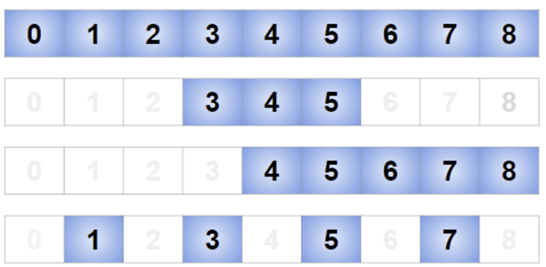

In [ ]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide13.PNG', width=700) 

  - #### *1️. Basic indexing (like in lists)*

In [ ]:
a = np.array([10, 20, 30, 40]) 
print(a[0]) 

10


In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]]) 
print(b[0, 1]) 

2


- #### *2️. Boolean indexing*

> *Theory:*

*You use a boolean condition to extract values that satisfy it.*

*This is extremely useful for selecting brain voxels above a threshold, for example.*



In [ ]:
a = np.array([10, 20, 30, 40]) 
mask = a > 25 
print(mask)

[False False  True  True]


In [ ]:
a = np.array([10, 20, 30, 40]) 
print(a[a > 25])

[30 40]


- #### *3️. Fancy indexing* 

> *Theory:*

*Instead of a slice, you use a list or array of indices to extract values.*

In [ ]:
a = np.array([10, 20, 30, 40]) 
indices = [0, 2] 
print(a[indices]) 

[10 30]


In [ ]:
b = np.array([[10, 20, 30, 40], [50, 60, 70, 80]]) 
b

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [ ]:
b = np.array([[10, 20, 30, 40], [50, 60, 70, 80]]) 
print(b[[0, 1], [2, 3]]) 
#b[0,2] = ?
#b[1, 3] = ?

[30 80]


In [ ]:
print(b[[0], 1:])

[[20 30 40]]


In [ ]:
array1 = np.array([[[1, 2, 8], [3, 4, 8]], [[5, 6, 9], [7, 8, 7]]])
array1

array([[[1, 2, 8],
        [3, 4, 8]],

       [[5, 6, 9],
        [7, 8, 7]]])

In [ ]:
print(array1[[0, 1], [1, 0], [0,1]])
#(0, 1, 1) = ?
# (1, 0, 1) = ?

[3 6]


In [ ]:
array1 = np.array([[[1, 2, 8], [3, 4, 8]], [[5, 6, 9], [7, 8, 7]]])

print(array1[[0], 1:])

[[[3 4 8]]]


- #### *4. indexing with ellipsis*

> *theory:*

*When you work with high-dimensional arrays, you can use `...` as a shortcut:*


In [39]:
a = np.arange(27).reshape(3, 3, 3)
print(a[1,...])

[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [ ]:
arr2d = np.array([
    [10, 11, 12],   # axis 0 (row 0)
    [20, 21, 22],   # axis 0 (row 1)
    [30, 31, 32]    # axis 0 (row 2)
])
    # axis 1 (column 0 , 1, 2)
    # axis 2 ? we don`t have`

arr2d



array([[10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [ ]:
#arr2d[axis0, axis1]

arr2d[..., 1] # just axis 1 with column 1 


array([11, 21, 31])

In [ ]:
#arr2d[axis0, axis1]

arr2d[1, ...] # just axis 0 with row1 


array([20, 21, 22])

In [ ]:
arr3d = np.array([
    [[1, 2, 3],
     [4, 5, 6]],

    [[7, 8, 9],
     [10, 11, 12]]
])
arr3d

# axis 0 =  blocks
# axis 1 =  rows
# axis 2 = columns

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0, ..., 2]


array([3, 6])

In [40]:

a = np.random.rand(64, 64, 36, 180) 
print([a[..., 0]]) # (64, 64, 36) → first timepoint


[array([[[0.2067405 , 0.33079553, 0.84014622, ..., 0.74845332,
         0.44926443, 0.91747957],
        [0.11693647, 0.74042684, 0.34958706, ..., 0.54470346,
         0.27488567, 0.83762633],
        [0.76351655, 0.40198052, 0.72345689, ..., 0.49916477,
         0.22368697, 0.24288656],
        ...,
        [0.11012621, 0.88792318, 0.41824018, ..., 0.30874973,
         0.88647339, 0.43543293],
        [0.65411022, 0.83717825, 0.81559028, ..., 0.49013554,
         0.6205284 , 0.5937752 ],
        [0.4144126 , 0.93359947, 0.32353975, ..., 0.64056563,
         0.77934613, 0.96755409]],

       [[0.52391271, 0.32498257, 0.30908117, ..., 0.67001355,
         0.93199692, 0.78905752],
        [0.92579147, 0.90716351, 0.6023891 , ..., 0.1453641 ,
         0.82787342, 0.39951868],
        [0.51069149, 0.64015706, 0.81459996, ..., 0.27183622,
         0.58172977, 0.63966162],
        ...,
        [0.37892211, 0.81401166, 0.81276476, ..., 0.27242615,
         0.36362742, 0.0485353 ],
        [0.

---

> ## **Slicing**

> *Theory:*

*You can extract sub-arrays using  notation:*           

*`array[start:stop:step]`* 

- *start: inclusive*

- *stop: exclusive*

- *step: step size (optional)*


In [ ]:
a = np.array([10, 20, 30, 40, 50]) 
print(a[1:4]) 


[20 30 40]


In [ ]:
a = np.array([10, 20, 30, 40, 50]) 
print(a[::2])

[10 30 50]


In [ ]:
a = np.array([10, 20, 30, 40, 50]) 
print(a[::-1])

[50 40 30 20 10]


In [49]:
b = np.array([[1, 2, 3], [4, 5, 6]]) 
b

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]]) 
print(b[1:2, 1:2]) 

[[5]]


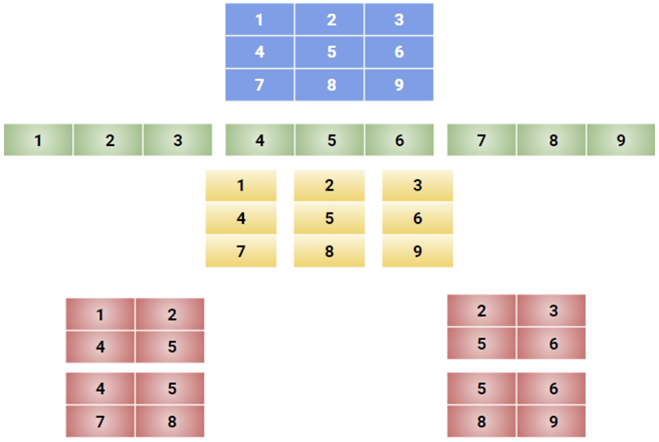

In [ ]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide14.PNG', width=900) 

---

# **“How can we apply a specific function (e.g. mean, thresholding) only to a part of an array — not the whole thing?”**

*In NumPy, any subset of an array (selected via indexing or slicing) is still a NumPy array itself.*

- *So, you can:*

    - *1️. Select a part of the array using slicing, boolean, or fancy indexing.*

    - *2️. Apply a function only to that selection.*

    - *3️. Optionally, assign the result back to the same or a new array.*


### *1. Slice + Apply Function*

>  *Apply function to a subarray*



In [7]:
matrix1 = np.array([[1, 2, 3], [4, 5, 6]]) 
matrix1_sqr = np.square(matrix1[0:2, 1:]) 
matrix1_sqr

array([[ 4,  9],
       [25, 36]])

### *2. Boolean Mask + Apply Function*

> *Apply function only to values that match a condition*


In [ ]:
matrix1 = np.array([10, 20, 30, 40, 50]) # Apply log only to values > 30 
mask = matrix1 > 30 
matrix1[mask] = np.mean(matrix1[mask]) 
matrix1 

array([10, 20, 30, 45, 45])

### *3. Fancy Indexing + Function*



In [ ]:

matrix1 = np.array([1, 2, 3, 4, 5]) 
idx = [1, 3] 
matrix1[idx] = np.mean(matrix1[idx]) 
matrix1


array([1, 3, 3, 3, 5])

### *4. Ellipis + Function*

In [8]:
a = np.arange(27).reshape(3, 3, 3)
print(np.mean(a[1,...]))

13.0


---

# **Array Manipulation**
*Several routines are available in NumPy package for manipulation of elements in ndarray object. They can be classified into different types*

# **Changing Shape**

| **No.** | **Function** | **Description** |
|:--|:--|:--|
| 1 | **`reshape()`** | Gives a new shape to an array without changing its data. |
| 2 | **`flatten()`** | Returns a copy of the array collapsed into one dimension. |
| 3 | **`transpose()`** | Permutes (reorders) the dimensions of an array. |
| 4 | **`ndarray.T`** | Shortcut for `array.transpose()`. |



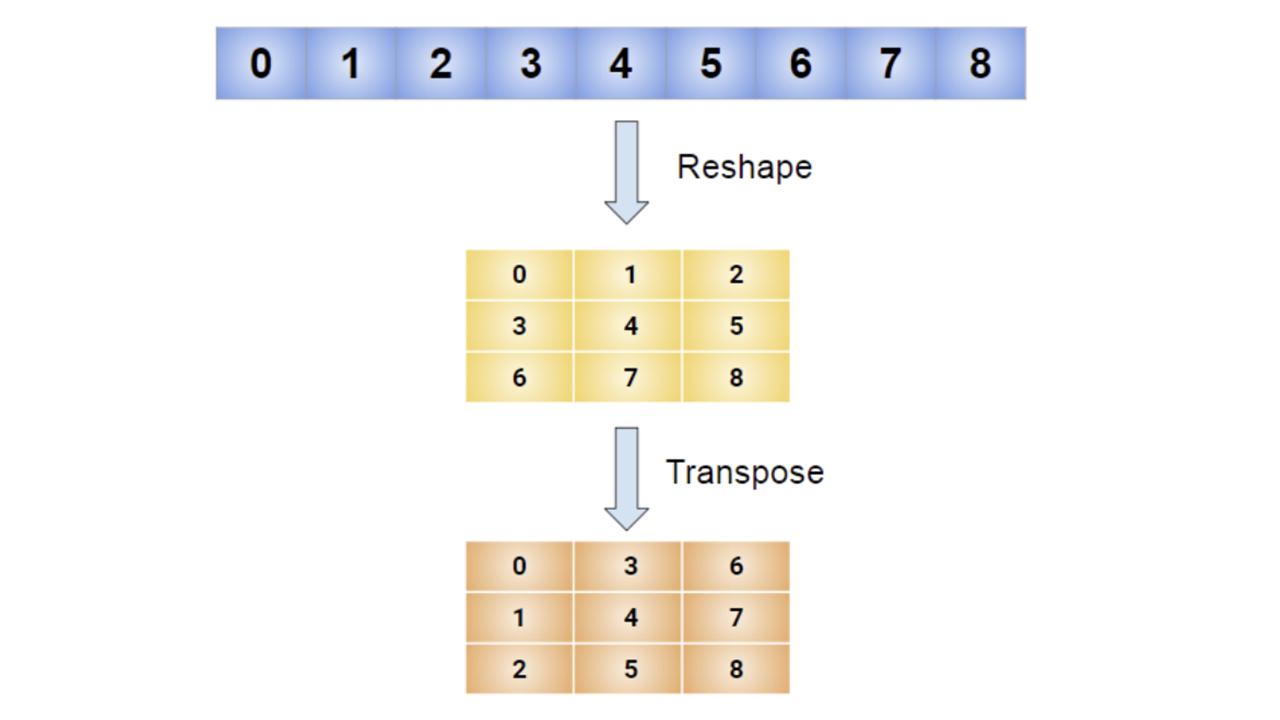

In [93]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide12.PNG', width=1000)


In [ ]:
matrix = np.array([1, 2, 3, 4, 5, 6])
reshaped_matrix = arr.reshape(2, 3)
reshaped_matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
matrix = np.arange(12)
matrix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
matrix = np.arange(12)
reshaped_matrix = matrix.reshape(2, 2, 3)
reshaped_matrix

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [14]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix)
flattened_matrix = matrix.flatten()
print(flattened_matrix )


[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


# **Transpose Operations**

| **No.** | **Operation** | **Description** |
|:--|:--|:--|
| 1 | **transpose()** | Permutes (reorders) the dimensions of an array. |
| 2 | **ndarray.T** | Shortcut for `array.transpose()`. |


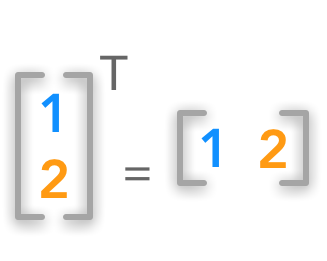

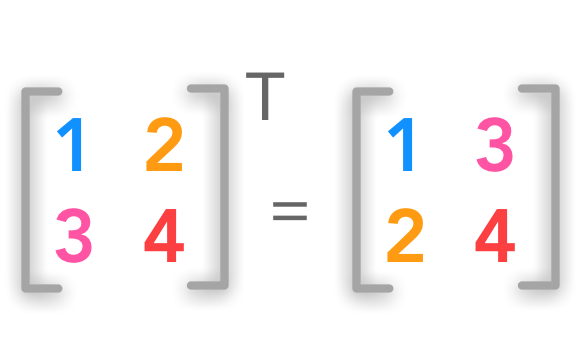

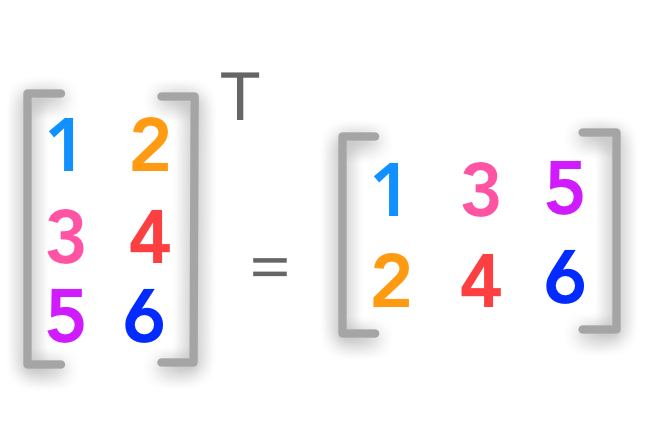

In [86]:
from IPython.display import Image, display

display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\vector-transposition.png', width=400))
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\square-matrix-transposition.png', width=400))
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\non-squared-matrix-transposition.png', width=400))


In [15]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
transposed_matrix = np.transpose(matrix)
transposed_matrix

array([[1, 4],
       [2, 5],
       [3, 6]])

---

# **Changing Dimensions**

| **No.** | **Function** | **Description** |
|:--|:--|:--|
| 1 | **`broadcast`** | Produces an object that mimics broadcasting between arrays. |



### *Broadcasting describes how NumPy automatically brings two arrays with different shapes to a compatible shape during arithmetic operations.*

### *Generally, the smaller array is “repeated” multiple times until both arrays have the same shape.*

### *Broadcasting is memory-efficient as it doesn’t actually copy the smaller array multiple times.*

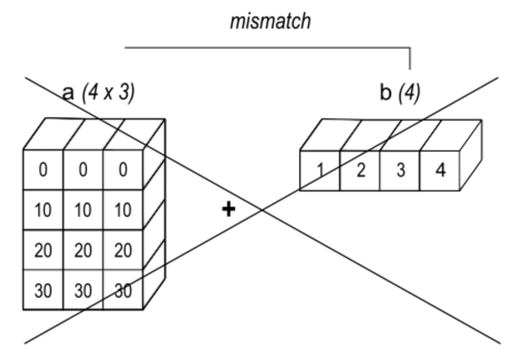

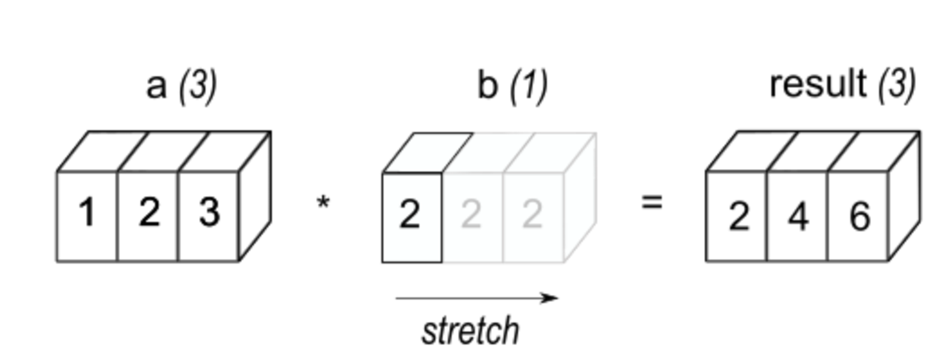

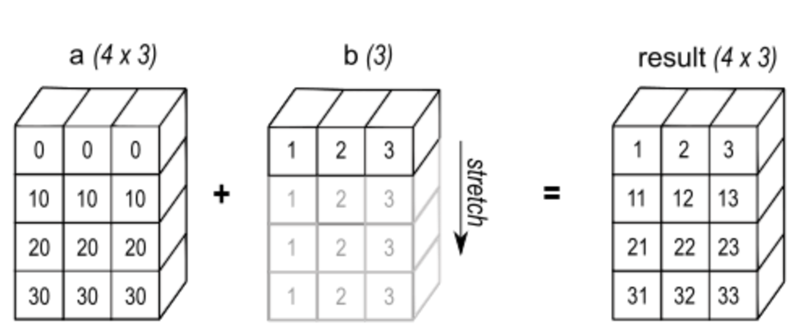

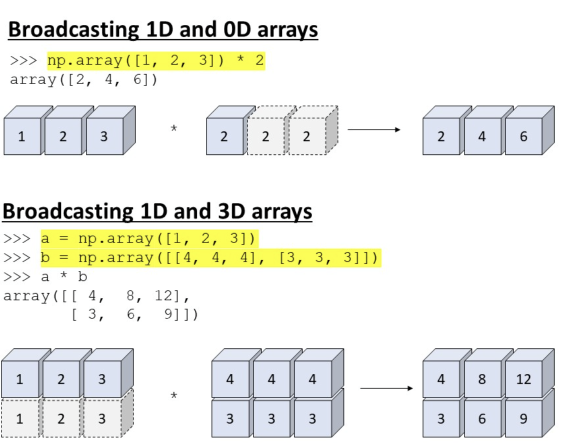

In [53]:
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide20.PNG', width=700)) 
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide18.PNG', width=700)) 
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide19.PNG', width=700)) 
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide21.PNG', width=700)) 

a.shape = (4, 3, 2)
         
          (1, 3, 2)

b.shape = (3,2)

or default is = (1,3, 2)


a.shape = (4, 3)

b.shape = (2, 3)

In [ ]:

a = np.array([[1,2,3],
              [4,5,6]])   # shape = (2, 3)
                                   # (1,3)
b = np.array([10, 20, 30]) # shape = (3,)

print(a + b)


[[11 22 33]
 [14 25 36]]


In [ ]:

x = np.array([[1,2,3],
              [4,5,6]])   # shape = (2, 3)
                                  # (1, 2)
y = np.array([10, 20])     # shape = (2,)

print(x + y)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

---

# **Joining Arrays**

| **No.** | **Function** | **Description** |
|:--|:--|:--|
| 1 | **`concatenate()`** | Joins a sequence of arrays along an existing axis. |



### *joins two or more arrays **along an existing axis** (not creating a new one).* 

### *All arrays must have the **same shape** except in the dimension along which they’re joined.*


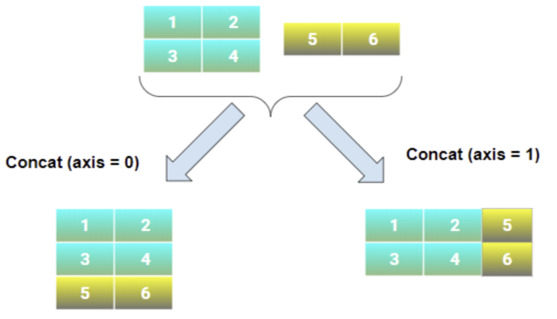

In [72]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation2\New folder\Presentation1\Slide15.PNG', width=700) 

In [66]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)


array([[1, 2],
       [3, 4],
       [5, 6]])

In [67]:
np.concatenate((a, b.T), axis=1)


array([[1, 2, 5],
       [3, 4, 6]])

In [65]:
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

In [69]:

# Define two 1-D arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Concatenate along the default axis (axis=0)
result = np.concatenate((array1, array2))

print("Result of concatenation:", result)	

Result of concatenation: [1 2 3 4 5 6]


In [ ]:

a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])          # shape = (2, 3)

b = np.array([
    [10, 20],
    [30, 40]
])          # shape = (2, 2)

# Attempt to concatenate along axis=0 (ROWs)
print(np.concatenate((a, b), axis=0))


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2


| **Method** | **Function** | **Description** | **Shape Requirement** | **Output Structure** |
|------------|--------------|------------------|------------------------|-----------------------|
| **Concatenate** | `np.concatenate((a, b), axis)` | Joins arrays along an existing axis | All dimensions must match except the chosen axis | Keeps the original number of dimensions |
| **Stack** | `np.stack((a, b), axis)` | Joins arrays along a **new axis** | Arrays must have exactly the same shape | Increases dimension by +1 |
| **HStack** | `np.hstack((a, b))` | Horizontal stack (column-wise) | Same number of rows | 2D result (wider matrix) |
| **VStack** | `np.vstack((a, b))` | Vertical stack (row-wise) | Same number of columns | 2D result (taller matrix) |
| **DStack** | `np.dstack((a, b))` | Depth-wise stack along axis=2 | Same 2D shape | Result has a third dimension |



---

# **Splitting Arrays**

| **No.** | **Function** | **Description** |
|:--|:--|:--|
| 1 | **`split()`** | Splits an array into multiple sub-arrays. |



## **np.split(ary, indices_or_sections, axis=0)**

### *divides an array into multiple **sub-arrays** along a specified axis.*

> *You can:*

- *Provide the number of **equal parts***  
- *Provide a **list of indices** where the split should occur.*

In [77]:

arr = np.array([1, 2, 3, 4, 5, 6])
parts = np.split(arr, 3)
print(parts)

[array([1, 2]), array([3, 4]), array([5, 6])]


In [ ]:
ary = np.array([10, 11, 12, 13, 14, 15])

result = np.split(ary, [2, 5])  # split at index 2 to 5

print(result)


[array([10, 11]), array([12, 13, 14]), array([15])]


In [79]:
mat = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
 
 
result = np.split(mat, 2, axis=0)
print(result)


[array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]])]


In [80]:
result = np.split(mat, 2, axis=1)
print(result)

[array([[1, 2],
       [5, 6]]), array([[3, 4],
       [7, 8]])]


# NumPy Splitting Methods

| Function | Axis of Split | Allows Unequal Split? | Description |
|----------|----------------|------------------------|-------------|
| `np.split()` | Any axis | ❌ No | Equal-size splits only |
| `np.array_split()` | Any axis | ✔ Yes | Safe split, no error |
| `np.hsplit()` | axis=1 | ✔ Yes | Horizontal (columns) split |
| `np.vsplit()` | axis=0 | ✔ Yes | Vertical (rows) split |
| `np.dsplit()` | axis=2 | ✔ Yes | Depth-wise (3D arrays) split |
| Manual slicing | Any axis | ✔ Yes | Most flexible method |


---

&nbsp; &nbsp; &nbsp;
# **Vectorization**


In [ ]:
import time


A = np.random.rand(1000000)
B = np.random.rand(1000000)

# Traditional way
start_time = time.time()
result_traditional = []
for i in range(len(A)):
    result_traditional.append(A[i] + B[i])
end_time = time.time()
traditional_time = end_time - start_time

print(f"Traditional method execution time: {traditional_time:.6f} seconds")


Traditional method execution time: 0.547085 seconds


In [ ]:
# Vectorization
start_time = time.time()
result_vectorized = A + B
end_time = time.time()
vectorized_time = end_time - start_time

print(f"Vectorized method execution time: {vectorized_time:.6f} seconds")

Vectorized method execution time: 0.013399 seconds


---

# **tasks:**

> ## **Question1:**

> Suppose the following data represent the fMRI signal intensity from a brain ROI (region of interest) across 8 time points:

         **fmri_signal = np.array([1200, 1350, 1600, 1450, 1800, 1700, 1550, 1400])** 
   
- Normalize the signal to the range [0, 1] using min-max normalization.

- Compute the mean and standard deviation of the normalized signal.

- Check whether the normalized signal has a mean in the range 0.5 ± 0.1 (a simple quality check for proper normalization).

> ## **your answer:**


- Normalize the signal to the range [0, 1] using min-max normalization.


- Compute the mean and standard deviation of the normalized signal.


- Check whether the normalized signal has a mean in the range 0.5 ± 0.1 (a simple quality check for proper normalization).

---

> ## **Question2:**

## **Create a Random Matrix and Perform Operations**


- Create a 4×4 correlation matrix representing connectivity between 4 brain regions during an fMRI scan.

- Calculate the determinant of the matrix.

- If the matrix is invertible, compute its inverse.

     > Hint:
     
Use np.linalg.det() for the determinant and np.linalg.inv() for the inverse.

> ## **your answer:**


- Create a 4×4 correlation matrix representing connectivity between 4 brain regions during an fMRI scan.


- Calculate the determinant of the matrix.


- If the matrix is invertible, compute its inverse.


---

>  ## **Question3:**

### **Simulate Random Data with Noise**


- Simulate a noisy fMRI time series for a single brain region.

- Create a sine wave with 100 points (to represent the expected BOLD response).

- Add random noise to the signal using np.random.randn().

- Print the resulting noisy time series.

     > Hint:
- Use np.sin() to create the signal and np.random.randn() to add noise.

>  ## **your answer:**


- Simulate a noisy fMRI time series for a single brain region.


- Create a sine wave with 100 points (to represent the expected BOLD response).


- Add random noise to the signal using np.random.randn().


- Print the resulting noisy time series.


---

> ## **Question4:**

### **Advanced Slicing and Indexing**


- You have a 2D NumPy array representing a simplified axial brain slice (shape = 6 × 6). 

- The numbers 100 represent brain tissue intensity, and 0 represents background:

slice_img = np.array([
    [100, 100, 100,   0,   0,   0],
    [100, 100, 100,   0,   0,   0],
    [100, 100, 100,   0,   0,   0],
    [  0,   0,   0, 100, 100, 100],
    [  0,   0,   0, 100, 100, 100],
    [  0,   0,   0, 100, 100, 100]
])

- Using slicing, extract:

     - The top-left quadrant (representing one hemisphere).

     - The bottom-right quadrant (representing the opposite hemisphere).

     > Hint:
- Use slicing to select sub-arrays:

> ## **Question4:**


- You have a 2D NumPy array representing a simplified axial brain slice (shape = 6 × 6). 


- The numbers 100 represent brain tissue intensity, and 0 represents background:

slice_img = np.array([
    
    [100, 100, 100,   0,   0,   0],

    [100, 100, 100,   0,   0,   0],

    [100, 100, 100,   0,   0,   0],

    [  0,   0,   0, 100, 100, 100],

    [  0,   0,   0, 100, 100, 100],
    
    [  0,   0,   0, 100, 100, 100]
])



- The top-left quadrant (representing one hemisphere).


- The bottom-right quadrant (representing the opposite hemisphere).


---

> ## **Question5:**

### **Reshape and Flatten**


You are working with neuroimaging data and need to flatten a 2D brain slice into a 1D vector for further processing (e.g., input into a machine learning model).

Generate a 4 × 4 matrix of random voxel intensities (values between 0 and 1) using `np.random.rand()`, then flatten it into a 1D array.

 > Hint:
 
Use `reshape()` or `.flatten()` to convert the matrix into a 1D vector.

> ## **your answer:**


Generate a 4 × 4 matrix of random voxel intensities (values between 0 and 1) using `np.random.rand()`, then flatten it into a 1D array.


Use `reshape()` or `.flatten()` to convert the matrix into a 1D vector.

---

> ## **Question6:**


### Task: Create a Masked Array Using Indexing

You are given the following array of ages:

`ages = np.array([18, 22, 29, 33, 40, 47, 52, 61])`

Your goal:

- Create a masked array in which:

    - Ages less than 30 are hidden (masked)

    - Ages 30 and above remain visible

    - Use the function: np.ma.masked_where()

Hint:

Use `np.ma.masked_where()`


> ## **your answer:**


You are given the following array of ages:

`ages = np.array([18, 22, 29, 33, 40, 47, 52, 61])`

- Create a masked array in which:

    - Ages less than 30 are hidden (masked)

    - Ages 30 and above remain visible

    - Use the function: np.ma.masked_where()

---

> ## **Question7:**

## Task: Concatenate Two Arrays Along Rows and Columns

You are given the following two 2D arrays:




In [ ]:
a = np.array([[1, 2],
              [3, 4]])

b = np.array([[5, 6],
              [7, 8]])

Your goal:

- Concatenate the two arrays vertically(So the result should have 4 rows and 2 columns.)

- Concatenate the same two arrays horizontally(So the result should have 2 rows and 4 columns.)


> ## **your answer:**

- Concatenate the two arrays vertically(So the result should have 4 rows and 2 columns.)


- Concatenate the same two arrays horizontally(So the result should have 2 rows and 4 columns.)


---

## **Question 8:**

### **Data Aggregation for Neuroimaging**


- Given the following 2D array representing fMRI data (shape \( 4 \times 3 \)) with values representing signal intensities across different brain regions:  
```python
fMRI_data = np.array([[80, 90, 85],
                      [70, 75, 78],
                      [88, 92, 94],
                      [60, 55, 58]])
```

- Find the average signal intensity for each brain region (column-wise) and the average signal intensity for each time point (row-wise).

     > Hint:
     
- Use `np.mean()` with `axis=0` for column-wise means and `axis=1` for row-wise means.


## **your answer:**


- Given the following 2D array representing fMRI data (shape \( 4 \times 3 \)) with values representing signal intensities across different brain regions:  
```python
fMRI_data = np.array([[80, 90, 85],
                      [70, 75, 78],
                      [88, 92, 94],
                      [60, 55, 58]])
```


- Find the average signal intensity for each brain region (column-wise) and the average signal intensity for each time point (row-wise).
